In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import numpy as np

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.shape

(5043, 28)

In [5]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [7]:
df.drop('movie_imdb_link', axis=1, inplace=True)

In [8]:
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [9]:
df.drop('color', axis=1, inplace=True)

In [10]:
df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [11]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
df.dropna(axis=0, subset=['director_name', 'num_critic_for_reviews',
                               'duration','director_facebook_likes','actor_3_facebook_likes',
                               'actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name',
                               'facenumber_in_poster','num_user_for_reviews','language','country',
                               'actor_2_facebook_likes','plot_keywords', 'title_year'],inplace=True)

In [13]:
df.shape

(4737, 26)

In [14]:
df['content_rating'].value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            3
TV-14           3
TV-PG           1
Name: content_rating, dtype: int64

In [15]:
df['content_rating'].fillna('R', inplace=True)

In [16]:
df['aspect_ratio'].value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
Name: aspect_ratio, dtype: int64

In [17]:
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

In [18]:
df['budget'].fillna(df['budget'].median(), inplace=True)

In [19]:
df['gross'].fillna(df['gross'].median(), inplace=True)

In [20]:
df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [21]:
df.duplicated().sum()

42

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(4695, 26)

In [24]:
df['language'].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Korean           8
Portuguese       8
Danish           5
Norwegian        4
Hebrew           4
Swedish          4
Persian          4
Dutch            4
Thai             3
Arabic           3
Aboriginal       2
Zulu             2
Indonesian       2
Dari             2
None             2
Icelandic        1
Greek            1
Filipino         1
Czech            1
Maya             1
Kazakh           1
Telugu           1
Dzongkha         1
Aramaic          1
Bosnian          1
Polish           1
Romanian         1
Mongolian        1
Hungarian        1
Vietnamese       1
Name: language, dtype: int64

In [25]:
df.drop('language', axis=1, inplace=True)

In [26]:
df['country'].value_counts()

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Denmark             11
Russia              11
Mexico              11
Ireland             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Iran                 4
Argentina            4
Thailand             4
West Germany         3
Israel               3
Switzerland          3
Belgium              3
Czech Republic       3
Taiwan               2
Hungary              2
Poland               2
Iceland              2
Greece               2
Romania              2
Slovakia             1
Kyrgyzstan           1
Indonesia            1
Peru                 1
Afghanistan          1
Bahamas              1
Philippines

In [27]:
df.drop('country', axis=1, inplace=True)

In [28]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,1.0,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,1.0,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [29]:
df['Profit'] = df['budget'].sub(df['gross'], axis=0)

In [30]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [31]:
df['Profit_Percentage'] = (df['Profit']/df['gross'])*100

In [32]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743


In [33]:
df['Profit'].value_counts()

-6005908.0     110
-23005908.0     27
-21005908.0     25
-25005908.0     24
-24005908.0     24
              ... 
-86546825.0      1
-9015786.0       1
-24550908.0      1
 12144354.0      1
-7168.0          1
Name: Profit, Length: 4135, dtype: int64

In [34]:
df.to_csv('dados_imdb_analiseexpl.csv', index=False)

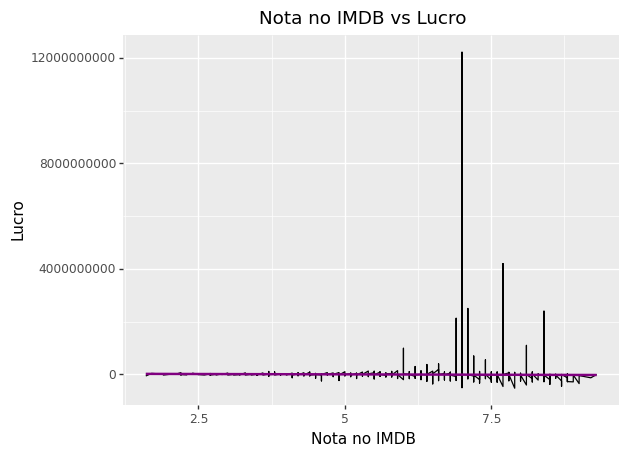

<ggplot: (-2127361854)>

In [35]:
(ggplot(df)+\
    aes(x='imdb_score', y='Profit') +\
    geom_line() +\
    labs(title='Nota no IMDB vs Lucro', x='Nota no IMDB', y='Lucro') +\
    stat_smooth(color='purple', span=1)
)

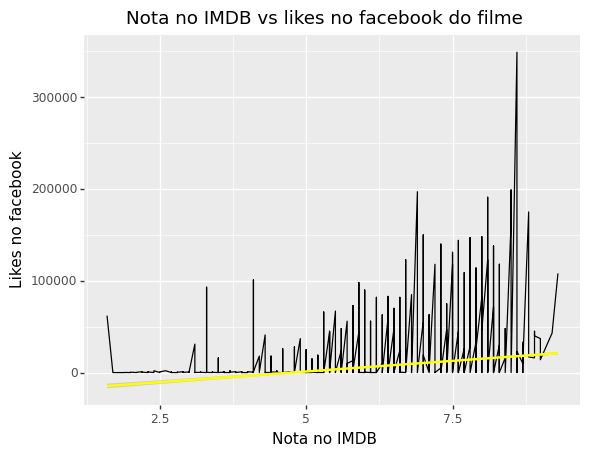

<ggplot: (22307069)>

In [36]:
(ggplot(df)+\
    aes(x='imdb_score', y='movie_facebook_likes') +\
    geom_line() +\
    labs(title='Nota no IMDB vs likes no facebook do filme', x='Nota no IMDB', y='Likes no facebook') +\
    stat_smooth(color='yellow', span=1)
)

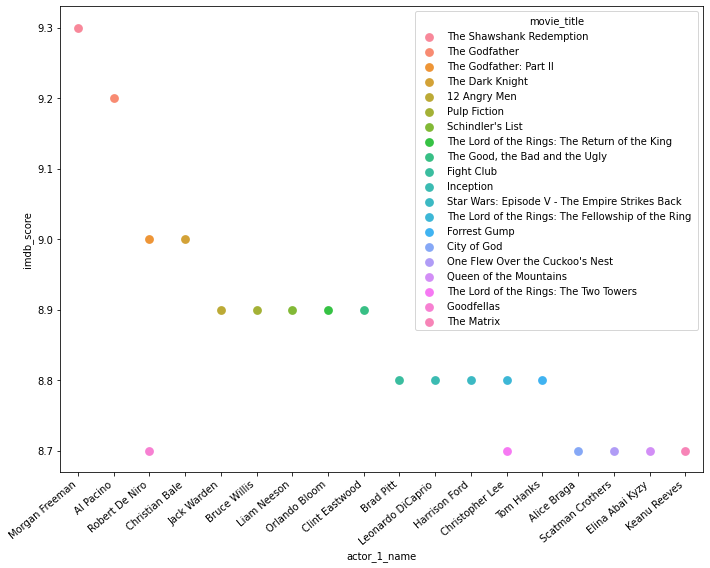

In [37]:
plt.figure(figsize=(10,8))

df= df.sort_values(by ='imdb_score' , ascending=False)
df2=df.head(20)
ax=sns.pointplot(df2['actor_1_name'], df2['imdb_score'], hue=df2['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [38]:
df.drop(columns=['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords', 'movie_title'], axis=1, inplace=True)

In [39]:
df['genres'].value_counts()

Drama                                               209
Comedy                                              186
Comedy|Drama|Romance                                182
Comedy|Drama                                        180
Comedy|Romance                                      149
                                                   ... 
Comedy|Music|Sci-Fi                                   1
Adventure|Drama|History|Romance|Thriller|War          1
Action|Animation|Comedy|Crime|Family                  1
Adventure|Animation|Comedy|Fantasy|Music|Romance      1
Action|Drama|Music|Romance                            1
Name: genres, Length: 875, dtype: int64

In [40]:
df.drop('genres', axis=1, inplace=True)

In [41]:
df.drop(columns=['Profit', 'Profit_Percentage'], axis=1, inplace=True)

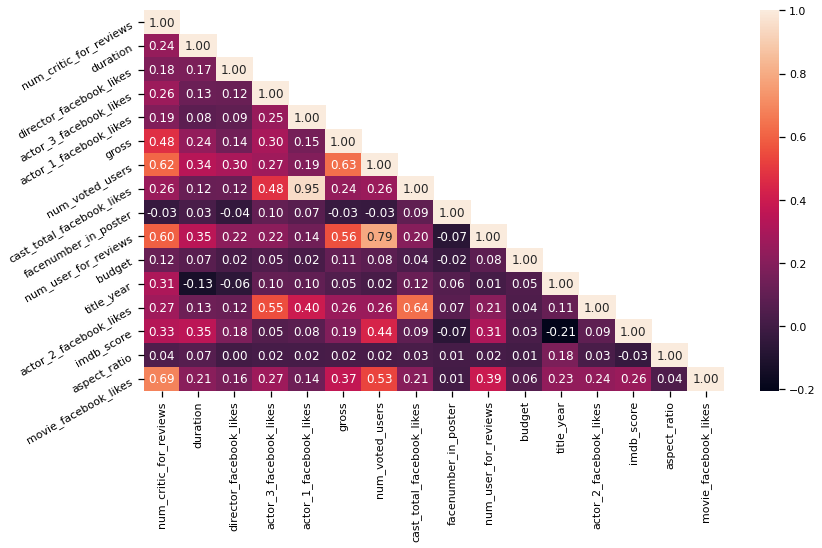

In [42]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [43]:
df['Other_actors_facebook_likes'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

In [44]:
df.drop(columns=['actor_2_facebook_likes', 'actor_3_facebook_likes',
                 'cast_total_facebook_likes'], axis=1, inplace=True)

In [45]:
df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']

In [46]:
df.drop(columns=['num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)

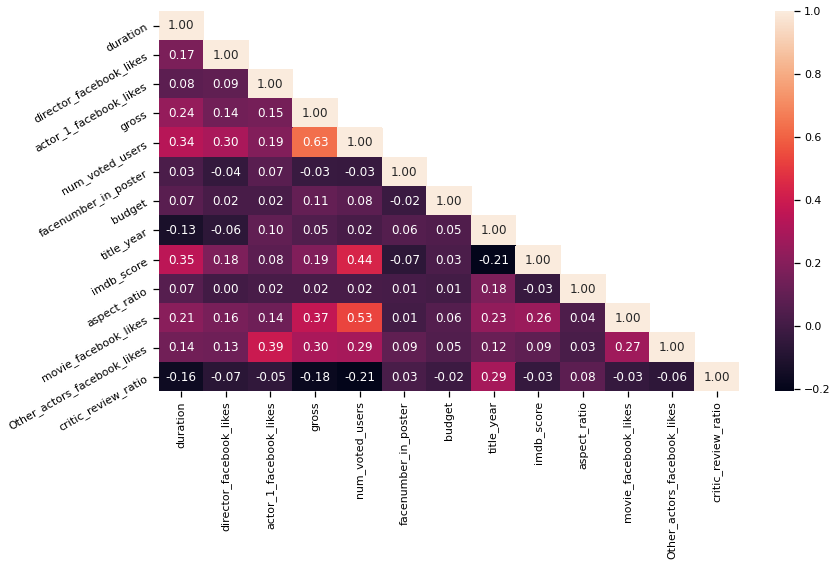

In [48]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [49]:
df['imdb_binned_score']=pd.cut(df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [50]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actors_facebook_likes,critic_review_ratio,imdb_binned_score
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,R,25000000.0,1994.0,9.3,1.85,108000,1206.0,0.048021,4
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,R,6000000.0,1972.0,9.2,1.85,43000,13000.0,0.092940,4
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,R,13000000.0,1974.0,9.0,1.85,14000,17000.0,0.229231,4
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,PG-13,185000000.0,2008.0,9.0,2.35,37000,24000.0,0.138204,4
4822,96.0,0.0,359.0,26005908.0,447785,1.0,Not Rated,350000.0,1957.0,8.9,1.66,40000,512.0,0.199324,4


In [51]:
df = pd.get_dummies(data = df, columns=['content_rating'], prefix=['content_rating'], drop_first=True)

In [52]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,25000000.0,1994.0,9.3,1.85,...,0,0,0,0,1,0,0,0,0,0
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,6000000.0,1972.0,9.2,1.85,...,0,0,0,0,1,0,0,0,0,0
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,13000000.0,1974.0,9.0,1.85,...,0,0,0,0,1,0,0,0,0,0
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,185000000.0,2008.0,9.0,2.35,...,0,0,1,0,0,0,0,0,0,0
4822,96.0,0.0,359.0,26005908.0,447785,1.0,350000.0,1957.0,8.9,1.66,...,1,0,0,0,0,0,0,0,0,0


In [53]:
df.to_csv('dados_imdb_comnota.csv', index=False)

In [54]:
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross',
                        'num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio',
                        'movie_facebook_likes','Other_actors_facebook_likes','critic_review_ratio',
                        'content_rating_G','content_rating_GP',
                        'content_rating_M','content_rating_NC-17','content_rating_Not Rated',
                        'content_rating_PG','content_rating_PG-13','content_rating_Passed',
                        'content_rating_R','content_rating_TV-14','content_rating_TV-G',
                        'content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=df)

In [55]:
y = pd.DataFrame(columns=['imdb_binned_score'], data=df)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression(verbose=1, max_iter=1000)
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


In [63]:
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [64]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [65]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

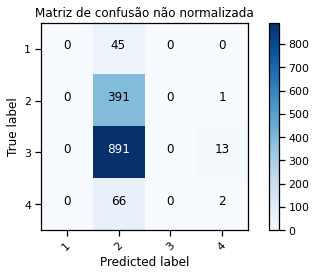

In [66]:
plot_confusion_matrix(cnf_matrix, classes=['1','2', '3', '4'],
                      title='Matriz de confusão não normalizada', normalize=False)

In [67]:
df['imdb_binned_score'].value_counts()

3    3015
2    1323
4     203
1     154
Name: imdb_binned_score, dtype: int64

In [68]:
print(metrics.classification_report(y_test, y_pred, target_names=['1','2','3','4']))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.28      1.00      0.44       392
           3       0.00      0.00      0.00       904
           4       0.12      0.03      0.05        68

    accuracy                           0.28      1409
   macro avg       0.10      0.26      0.12      1409
weighted avg       0.08      0.28      0.12      1409



c:\users\thalita\appdata\local\programs\python\python38-32\programaria\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
import pickle 

In [70]:
modelo_treinado = 'modelo_imdb.sav'

In [71]:
pickle.dump(logit, open(modelo_treinado, 'wb'))

In [72]:
modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [73]:
X_test[0]

array([ 1.06000000e+02,  1.00000000e+03,  8.16000000e+02,  9.19052500e+06,
        1.02125000e+05,  1.00000000e+00,  7.00000000e+06,  2.00900000e+03,
        1.85000000e+00,  1.00000000e+04,  2.03000000e+02,  1.05246914e+00,
       -3.45973335e-17, -8.64933336e-18,  1.24334167e-17,  5.40583335e-19,
        4.00031668e-17,  4.75713335e-17, -2.37856667e-17, -1.29740000e-17,
        1.00000000e+00, -2.16233334e-18,  1.18928334e-17, -1.29740000e-17,
        1.56769167e-17,  3.67596668e-17])

In [74]:
modelo_carregado.predict([X_test[0]])

array([2], dtype=int64)